In [6]:
import requests
import json as js
import re
import pandas as pd
from bs4 import BeautifulSoup
url = "https://decarocalzature.com/"
url_prodotti = url+"tag-prodotto/de-caro/"
url_prodotto = url+"prodotto/"
uri_page= "page/"
#price_product = "<span class=woocommerce-Price-amount amount><bdi><span class=woocommerce-Price-currencySymbol>€</span>26,90</bdi></span>
title_list = list()
price_list = list()
categorys = set()
categorys_list = list()
dict = {"modello": [], "categoria": [], "prezzo": []}
for page in range(2,27):
    if(page==1):
        url_for = url_prodotti
    else:
        url_for = url_prodotti+uri_page+str(page)+"/"
    soup = BeautifulSoup(requests.get(url_for).text)
    product_scraped = soup.find_all("a", attrs={"class": "woocommerce-LoopProduct-link woocommerce-loop-product__link"})
    for product in product_scraped:
        title = product.find("h2", attrs={"class": "woocommerce-loop-product__title"}) 
        title_str = title.text.strip()
        title_list.append(title_str)
        category = title_str.strip().split(" ")[0]
        categorys.add(category)
        categorys_list.append(category)
        price = product.find("bdi")
        price_str = price.text.strip().replace(",",".").replace("€","")
        price_list.append(price_str)
for modello, category, prezzo in zip(title_list,categorys_list,price_list):
    dict["categoria"].append(category)
    dict["modello"].append(modello)
    dict["prezzo"].append(prezzo)
            
DeCaro = pd.DataFrame(dict)
DeCaro

,modello,categoria,prezzo
0,Sandali bassi Digue gladiatore fasciati con bo...,Sandali,14.90
1,Sandali bassi Margherita vera pelle infradito ...,Sandali,45.90
2,Sandali Antigua con zeppa alta spuntatine slin...,Sandali,45.90
3,Sandali bassi Barth con zeppa comoda giornaliera,Sandali,24.90
4,Sneakers Mandy con zeppa platform e fermagli s...,Sneakers,23.90
...,...,...,...
203,Anfibi Tod vera pelle stivali con tacco carrar...,Anfibi,84.90
204,Stivali Why alti a tubo VERA PELLE con zeppa i...,Stivali,89.90
205,Stivali Nepal beatles vera pelle tacco carrarm...,Stivali,89.90
206,Ciabatte Amalfi vera pelle sandali bassi con f...,Ciabatte,29.90


In [9]:
DeCaro.prezzo = DeCaro.prezzo.astype(float)
DeCaro

,modello,categoria,prezzo
0,Sandali bassi Digue gladiatore fasciati con bo...,Sandali,14.9
1,Sandali bassi Margherita vera pelle infradito ...,Sandali,45.9
2,Sandali Antigua con zeppa alta spuntatine slin...,Sandali,45.9
3,Sandali bassi Barth con zeppa comoda giornaliera,Sandali,24.9
4,Sneakers Mandy con zeppa platform e fermagli s...,Sneakers,23.9
...,...,...,...
203,Anfibi Tod vera pelle stivali con tacco carrar...,Anfibi,84.9
204,Stivali Why alti a tubo VERA PELLE con zeppa i...,Stivali,89.9
205,Stivali Nepal beatles vera pelle tacco carrarm...,Stivali,89.9
206,Ciabatte Amalfi vera pelle sandali bassi con f...,Ciabatte,29.9


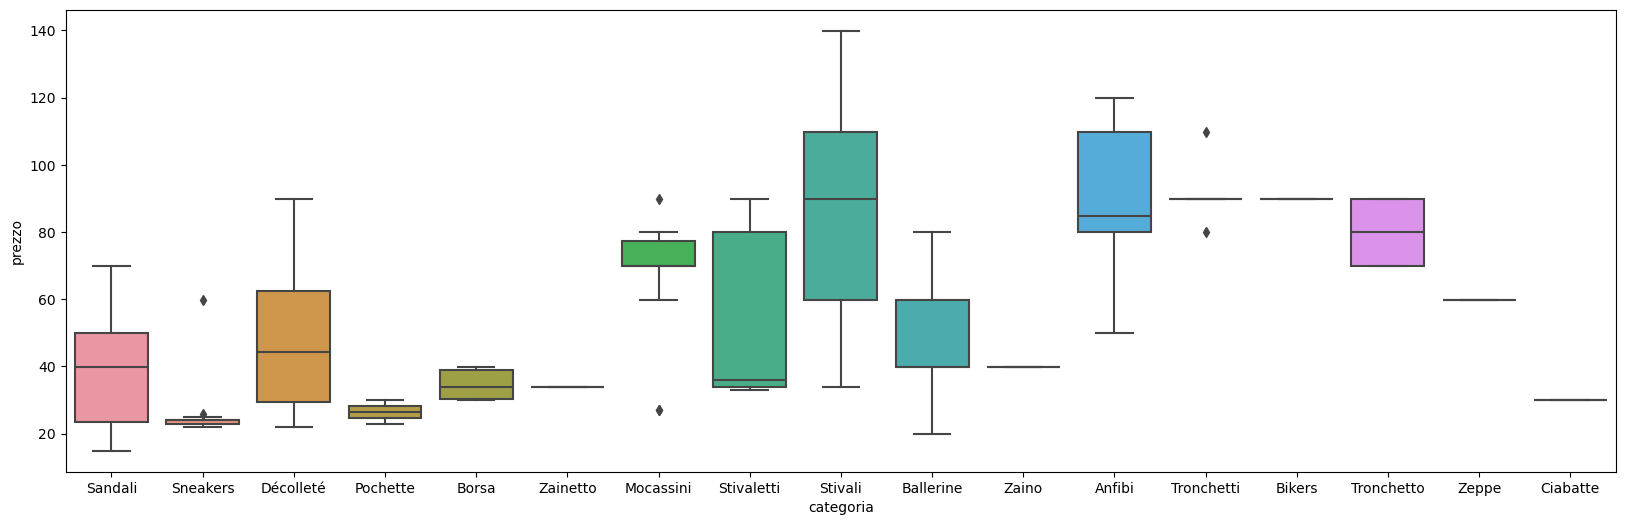

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.boxplot(x="categoria", y="prezzo", data=DeCaro)
plt.show()

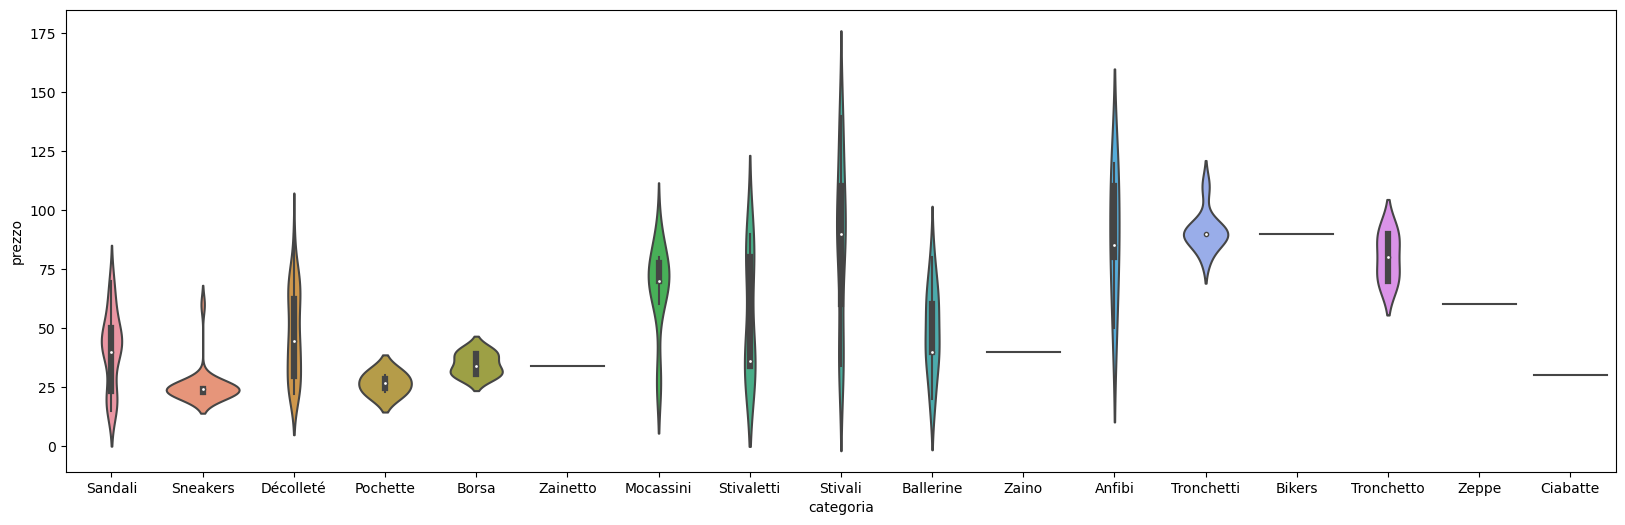

In [12]:
plt.figure(figsize=(20, 6))
sns.violinplot(x="categoria", y="prezzo", data=DeCaro)
plt.show()

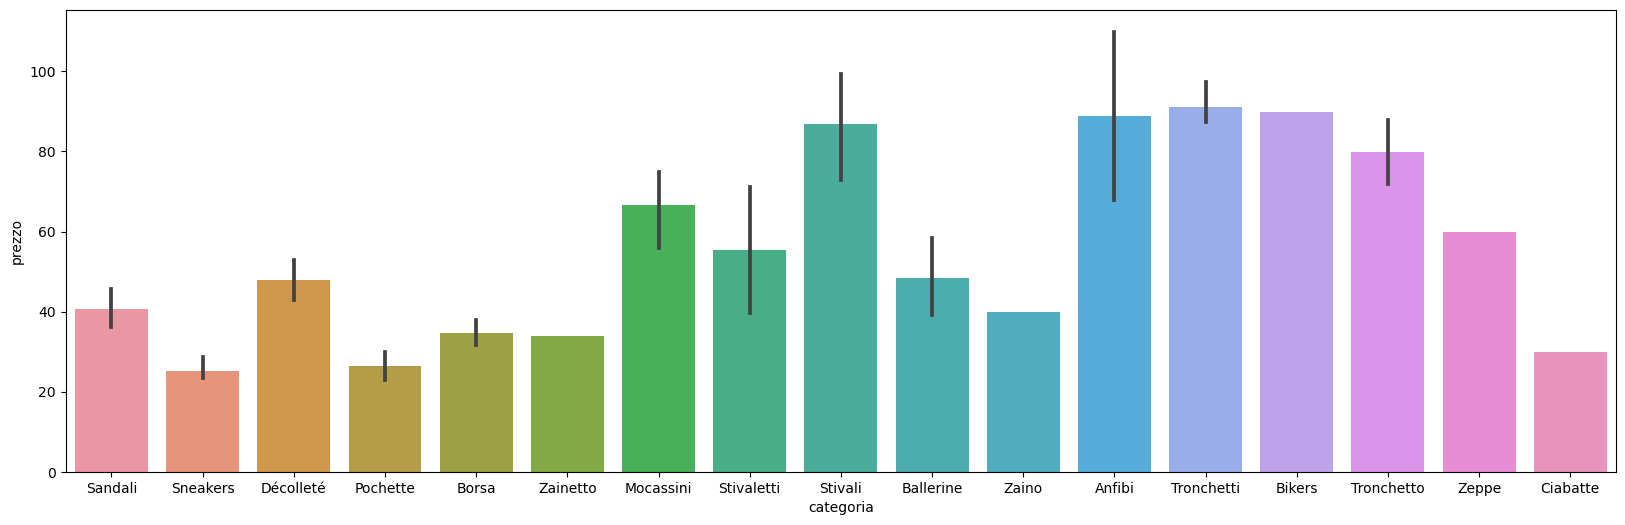

In [13]:
plt.figure(figsize=(20, 6))
sns.barplot(x="categoria", y="prezzo", data = DeCaro)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Décolleté'),
  Text(1, 0, 'Sandali'),
  Text(2, 0, 'Stivali'),
  Text(3, 0, 'Sneakers'),
  Text(4, 0, 'Mocassini'),
  Text(5, 0, 'Ballerine'),
  Text(6, 0, 'Stivaletti'),
  Text(7, 0, 'Tronchetti'),
  Text(8, 0, 'Borsa'),
  Text(9, 0, 'Anfibi'),
  Text(10, 0, 'Tronchetto'),
  Text(11, 0, 'Pochette'),
  Text(12, 0, 'Zainetto'),
  Text(13, 0, 'Zaino'),
  Text(14, 0, 'Bikers'),
  Text(15, 0, 'Zeppe'),
  Text(16, 0, 'Ciabatte')])

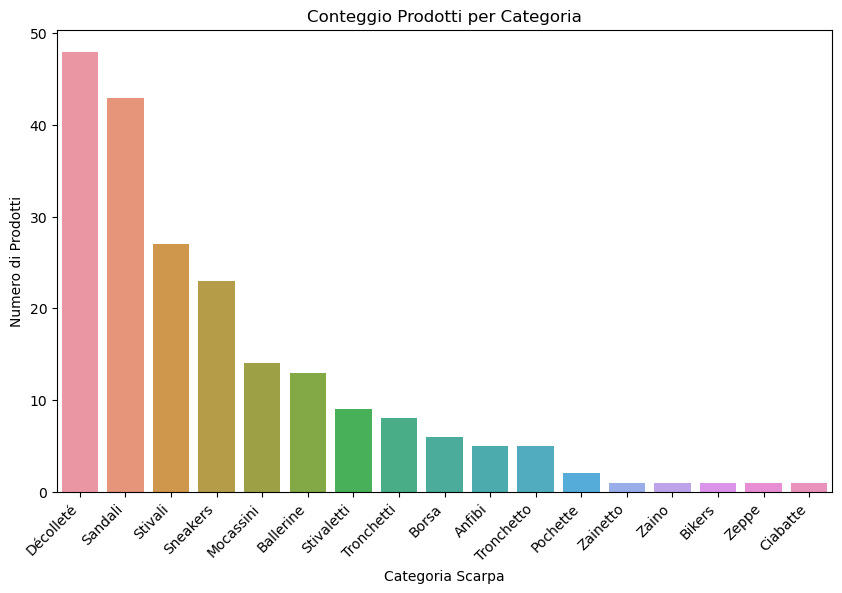

In [14]:
prodotti_per_categoria = DeCaro['categoria'].value_counts()
plt.figure(figsize=(10, 6)) 
sns.barplot(x=prodotti_per_categoria.index, y=prodotti_per_categoria.values)
plt.xlabel('Categoria Scarpa')
plt.ylabel('Numero di Prodotti')
plt.title('Conteggio Prodotti per Categoria')
plt.xticks(rotation=45, ha='right')

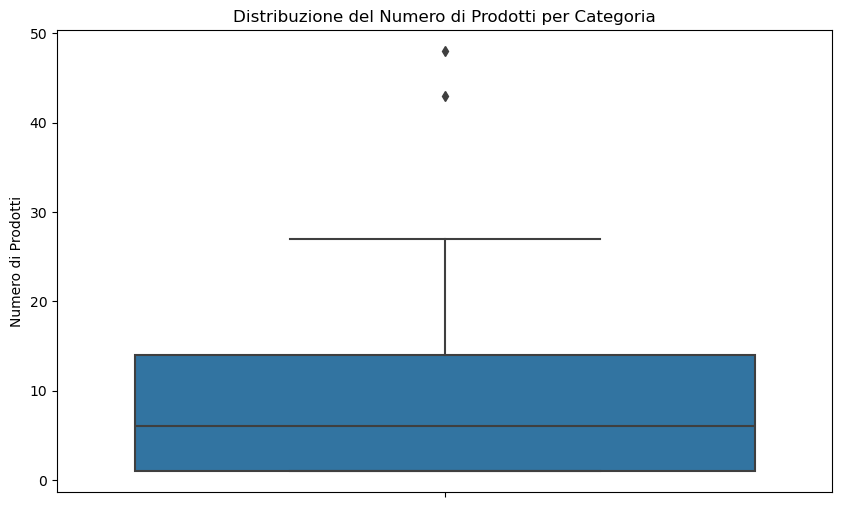

In [15]:
prodotti_per_categoria = DeCaro['categoria'].value_counts()
plt.figure(figsize=(10, 6))  
sns.boxplot(y=prodotti_per_categoria.values)
plt.ylabel('Numero di Prodotti')
plt.title('Distribuzione del Numero di Prodotti per Categoria')
plt.show()

In [16]:
gruppo_tipologia = DeCaro.groupby('categoria')
statistiche_prezzo = gruppo_tipologia['prezzo'].describe()
statistiche_prezzo

,count,mean,std,min,25%,50%,75%,max
categoria,,,,,,,,
Anfibi,5.0,88.900000,27.477263,49.9,79.90,84.9,109.90,119.9
Ballerine,13.0,48.438462,18.058310,19.9,39.90,39.9,59.90,79.9
Bikers,1.0,89.900000,NaN,89.9,89.90,89.9,89.90,89.9
Borsa,6.0,34.566667,4.676181,29.9,30.40,33.9,38.90,39.9
Ciabatte,1.0,29.900000,NaN,29.9,29.90,29.9,29.90,29.9
Décolleté,48.0,47.795833,18.707422,21.9,29.40,44.4,62.40,89.9
Mocassini,14.0,66.614286,18.285886,26.9,69.90,69.9,77.40,89.9
Pochette,2.0,26.400000,4.949747,22.9,24.65,26.4,28.15,29.9
Sandali,43.0,40.644186,16.010552,14.9,23.40,39.9,49.90,69.9


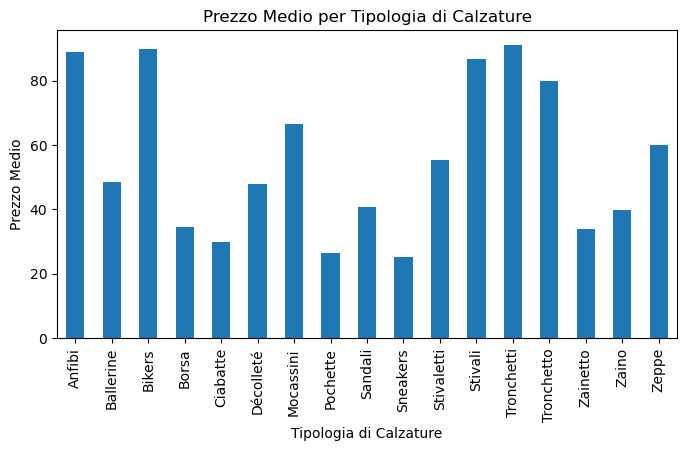

            count       mean        std   min    25%   50%     75%    max
categoria                                                                
Anfibi        5.0  88.900000  27.477263  49.9  79.90  84.9  109.90  119.9
Ballerine    13.0  48.438462  18.058310  19.9  39.90  39.9   59.90   79.9
Bikers        1.0  89.900000        NaN  89.9  89.90  89.9   89.90   89.9
Borsa         6.0  34.566667   4.676181  29.9  30.40  33.9   38.90   39.9
Ciabatte      1.0  29.900000        NaN  29.9  29.90  29.9   29.90   29.9
Décolleté    48.0  47.795833  18.707422  21.9  29.40  44.4   62.40   89.9
Mocassini    14.0  66.614286  18.285886  26.9  69.90  69.9   77.40   89.9
Pochette      2.0  26.400000   4.949747  22.9  24.65  26.4   28.15   29.9
Sandali      43.0  40.644186  16.010552  14.9  23.40  39.9   49.90   69.9
Sneakers     23.0  25.247826   7.595505  21.9  22.90  23.9   23.90   59.9
Stivaletti    9.0  55.455556  25.759033  32.9  33.90  35.9   79.90   89.9
Stivali      27.0  86.751852  34.81346

In [17]:
statistiche_prezzo['mean'].plot(kind='bar', figsize=(8, 4))
plt.xlabel('Tipologia di Calzature')
plt.ylabel('Prezzo Medio')
plt.title('Prezzo Medio per Tipologia di Calzature')
plt.show()
print(statistiche_prezzo)

                 mean   min    max
categoria                         
Anfibi      88.900000  49.9  119.9
Ballerine   48.438462  19.9   79.9
Bikers      89.900000  89.9   89.9
Borsa       34.566667  29.9   39.9
Ciabatte    29.900000  29.9   29.9
Décolleté   47.795833  21.9   89.9
Mocassini   66.614286  26.9   89.9
Pochette    26.400000  22.9   29.9
Sandali     40.644186  14.9   69.9
Sneakers    25.247826  21.9   59.9
Stivaletti  55.455556  32.9   89.9
Stivali     86.751852  33.9  139.9
Tronchetti  91.150000  79.9  109.9
Tronchetto  79.900000  69.9   89.9
Zainetto    33.900000  33.9   33.9
Zaino       39.900000  39.9   39.9
Zeppe       59.900000  59.9   59.9


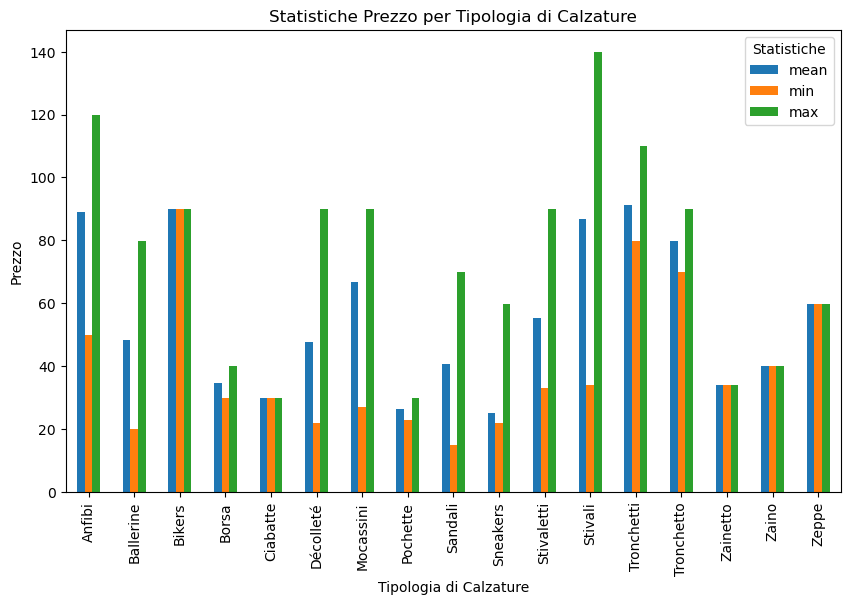

In [19]:
gruppo_categoria = DeCaro.groupby('categoria')
statistiche_prezzo = gruppo_categoria['prezzo'].agg(['mean', 'min', 'max'])
print(statistiche_prezzo)
statistiche_prezzo.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipologia di Calzature')
plt.ylabel('Prezzo')
plt.title('Statistiche Prezzo per Tipologia di Calzature')
plt.legend(title='Statistiche')
plt.show()